<a href="https://colab.research.google.com/github/frcaulia/machine_learning/blob/main/Module_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Faricha Aulia ✨**
Machine Learning Course : Module 9 Lab Work Assignment

---

## **Perform classification on the MNIST dataset using an Artificial Neural Network (ANN) model.**


### a. Preprocessing methods.

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784")

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
# Display the dimensions of the data
print("Number of samples:", mnist.data.shape[0])  # Number of samples/data points
print("Dimensions of each sample:", mnist.data.shape[1])  # Dimensions of each sample
print("Number of classes:", len(set(mnist.target)))  # Number of classes (unique)

Number of samples: 70000
Dimensions of each sample: 784
Number of classes: 10


In [3]:
# Extract data and labels
X = mnist.data.astype('float32')
y = mnist.target.astype('int')

# Check the shape of the data
print("Data shape:", X.shape)

Data shape: (70000, 784)


### b. Feature selection.

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Scaling data using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Feature extraction using PCA with n_components set to 300
pca = PCA(n_components=300)
X_pca = pca.fit_transform(X_scaled)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


### c. ANN architecture.

In [6]:
from keras.models import Sequential
from keras.layers import Dense

# Create an ANN model
model = Sequential()

# 128 units in the first hidden layer
model.add(Dense(units=128, activation='relu', input_dim=300))

# 64 units in the second hidden layer
model.add(Dense(units=64, activation='relu'))

# 32 units in the third hidden layer
model.add(Dense(units=32, activation='relu'))

# Add the output layer
model.add(Dense(units=10, activation='softmax'))

### d. Activation functions.


In [7]:
# Compilation of the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## **You should explain the results you obtain**

### a. Accuracy.

In [12]:
# Training Accuracy
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f'Training Loss: {train_loss:.4f}')
print(f'Training Accuracy: {train_accuracy:.4f}')

# Testing Accuracy
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')

1750/1750 [==============================] - 3s 2ms/step - loss: 2.3707 - accuracy: 0.1025
Training Loss: 2.3707
Training Accuracy: 0.1025
438/438 [==============================] - 1s 2ms/step - loss: 2.3683 - accuracy: 0.1017
Loss: 2.3683
Accuracy: 0.1017


### b. Confusion matrix.

In [13]:
# Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
confusion_mtx = confusion_matrix(y_test, y_pred_classes)

print("Confusion Matrix:")
print(confusion_mtx)

438/438 [==============================] - 1s 1ms/step
Confusion Matrix:
[[   0    3    8    0    0   42    3    0    6 1281]
 [   0    8    8    0    0  147    1    0    1 1435]
 [   0  154   33    0    1  126   11    0    3 1052]
 [   0   13    2    0    0   61    9    0    0 1348]
 [   0  162   49    0    0   79    3    0    1 1001]
 [   0    4    0    0    1   93    2    0    0 1173]
 [   2   10   20    0    4  212    5    0   11 1132]
 [   0   26    5    0    0   83    4    0    7 1378]
 [   0    7    0    0    1   59    3    0    1 1286]
 [   0   72   10    0    0   48    3    0    3 1284]]


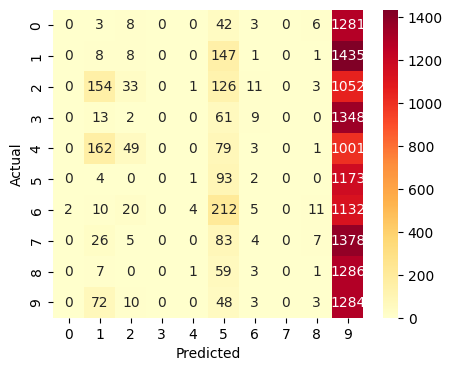

In [24]:
import pandas as pd

# Create a DataFrame
confusion_df = pd.DataFrame(conf_matrix, columns=[f'Predicted {i}' for i in range(10)], index=[f'Actual {i}' for i in range(10)])
print(styled_confusion_df)

# Display the heatmap with 'YlOrRd' colormap
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlOrRd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()